In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Importation de la librairie 

In [2]:
#représenter un arbre de décision
from sklearn.tree import DecisionTreeClassifier

# Chargement des données

In [3]:
#donnes 
df = pd.read_csv("titanic-passengers.csv", sep = ";")

# Visualisation des données

In [4]:
df.head

<bound method NDFrame.head of      PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886          779       No       3   
887          435       No       1   
888          342      Yes       1   
889          633      Yes       1   
890          111       No       1   

                                            Name     Sex   Age  SibSp  Parch  \
0                     Collander, Mr. Erik Gustaf    male  28.0      0      0   
1                        Moen, Mr. Sigurd Hansen    male  25.0      0      0   
2                         Jensen, Mr. Hans Peder    male  20.0      0      0   
3    Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0      4   
4                         Davidson, Mr. Thornton    male  31.0      1      0   
..                                           

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Embarked     891 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 62.8+ KB


In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.836071,14.526497,1.102743,0.806057
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         0
dtype: int64

# Nettoyage des données 

Mettre la variable de sexe (qualitative) en quantitative. 

In [8]:
sex_male = []
for i in range(len(df)):
    if df.Sex[i] == "male": 
        sex_male.append(0)
    else: 
        sex_male.append(1)
        
df["Sex_male"] = pd.DataFrame(sex_male)
del df["Sex"] 

Voici un jeu de données où il y aura aucune valeur manquante.

In [9]:
df_drop = df.dropna()
df_drop.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Embarked       0
Sex_male       0
dtype: int64

In [10]:
df_drop = df_drop.reset_index()
del df_drop["index"] 

# Variable Survived

In [11]:
df_drop.groupby(['Survived']).Survived.count()

Survived
No     424
Yes    290
Name: Survived, dtype: int64

La variable est qualititve : "no" et "yes" afin de dire si une personne a survécu ou non. Il y a 424 personnes qui sont morts et 290 qui sont vivants.


Réparatition en pourcentage : 

In [12]:
pd.crosstab(df_drop.Survived, "freq", normalize = True)

col_0,freq
Survived,
No,0.593838
Yes,0.406162


array([<AxesSubplot: ylabel='Pourcentage de la répartition des passagers selon leur survie'>],
      dtype=object)

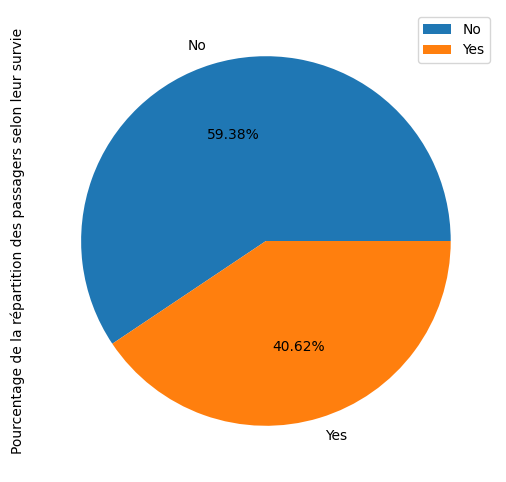

In [13]:
Su2 = pd.crosstab(df_drop.Survived, "Pourcentage de la répartition des passagers selon leur survie")
Su2.plot.pie(subplots=True, figsize = (6, 6), autopct = lambda x: str(round(x, 2)) + '%')

# Arbre de décision pour variable Survived

In [14]:
survived = df_drop.Survived
survived.head()

0    No
1    No
2    No
3    No
4    No
Name: Survived, dtype: object

On sélectionne les variables qui caractérisent la variable Survived.  

In [15]:
data = df_drop[["Pclass", "Age", "SibSp", "Parch", "Sex_male"]]
data.head()

,Pclass,Age,SibSp,Parch,Sex_male
0,2,28.0,0,0,0
1,3,25.0,0,0,0
2,3,20.0,0,0,0
3,3,29.0,0,4,1
4,1,31.0,1,0,0


In [16]:
X = data.values
y = survived.values

Nous générons l'arbre de décision : 

In [17]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

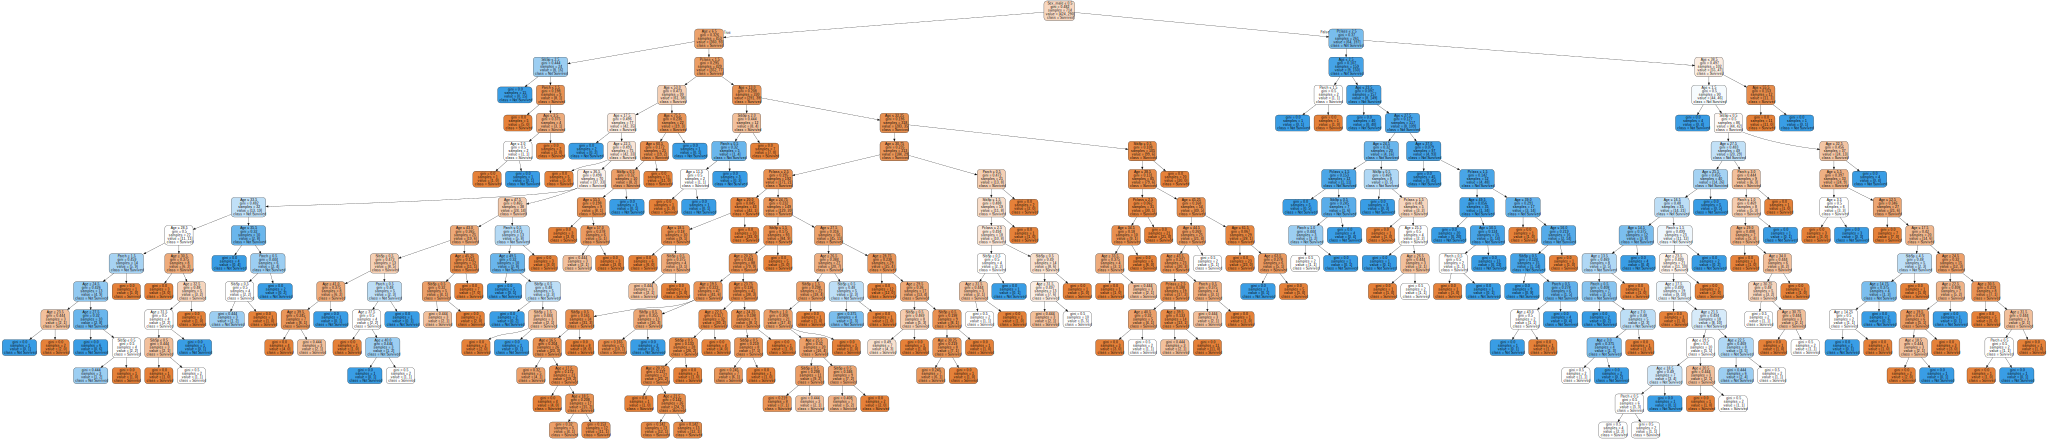

In [18]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=data.columns.values,  
                         class_names=['Survived','Not Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

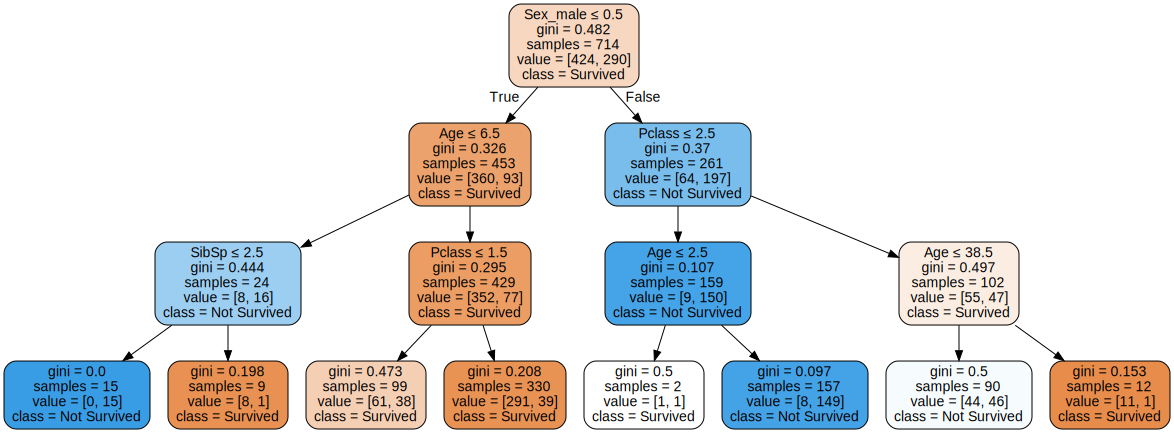

In [33]:
clf_best = DecisionTreeClassifier(max_depth = 3)
clf_best = clf_best.fit(X, y)
dot_data_best = tree.export_graphviz(clf_best, out_file=None, 
                         feature_names=data.columns.values,  
                         class_names=['Survived','Not Survived'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph_best = graphviz.Source(dot_data_best) 
graph_best

## Sélection des femmes de classes 1 et 2 : 

In [20]:
ex = df_drop.loc[(df_drop.Sex_male == 1) & (df_drop.Pclass != 3)]
ex.groupby(['Survived']).Survived.count()

Survived
No       9
Yes    150
Name: Survived, dtype: int64

Il y a 9 femmes qui sont mortes.

In [21]:
pd.crosstab(ex.Survived, "freq", normalize = True)

col_0,freq
Survived,
No,0.056604
Yes,0.943396


De ce fait, il y a 94% des femmes qui ne sont pas mortes. 

## Ajout d'un passager

In [22]:
newp = pd.DataFrame([3,19,3,0,1]).T
newp.columns = ["Pclass","Age","SibSp","Parch","Sex_male"]
newp

,Pclass,Age,SibSp,Parch,Sex_male
0,3,19,3,0,1


In [23]:
y_pred = clf.predict(newp)
newp['Survived'] = y_pred
newp

d:\python_prj\datamining\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,Pclass,Age,SibSp,Parch,Sex_male,Survived
0,3,19,3,0,1,Yes


## Séparation des données  

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0, stratify=y)

In [25]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
Y_pred = model.predict(X_test)

In [26]:
clf.score(X_train, y_train)

0.9352014010507881

### Pourcentage de survivant et mort d'après la prédiction : 

In [27]:
yes = 0
no = 0
somme_tout = 0
for i in Y_pred: 
    if i == "Yes":
        yes += 1
    else:
        no += 1
    somme_tout += 1

print("Pourcentage de survivant d'après la prédiction : " , yes/somme_tout)

Pourcentage de survivant d'après la prédiction :  0.35664335664335667


Pourcentage de mort d'après la prédiction : 

In [28]:
print("Pourcentage de mort d'après la prédiction : " , no/somme_tout)

Pourcentage de mort d'après la prédiction :  0.6433566433566433


## Matrice de confusion : 

In [29]:
confusion_matrix(y_test,Y_pred)

array([[73, 12],
       [19, 39]], dtype=int64)